In [128]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns



In [129]:
# List files available
print(os.listdir("input"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv']


In [130]:
# Training data
app_train = pd.read_csv('input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

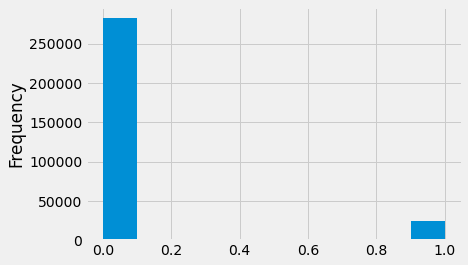

In [132]:
app_train['TARGET'].astype(int).plot.hist();

imbalanced class problem


## Examine Missing Values

Next we can look at the number and percentage of missing values in each column.


In [133]:
 #Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [134]:


# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)



Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


An option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

In [135]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Let's now look at the number of unique entries in each of the object (categorical) columns.

In [136]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64



Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!



## Encoding Categorical Variables

Before we go any further, we need to deal with pesky categorical variables. A machine learning model unfortunately cannot deal with categorical variables

    Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. 
    
    One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns. 


## Label Encoding and One-Hot Encoding

Let's implement the policy described above: for any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.

For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.


In [137]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform training data
            app_train[col] = le.transform(app_train[col])

# Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [138]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)

print('Training Features shape: ', app_train.shape)

Training Features shape:  (307511, 243)


## Anomalies

One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method. The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

In [139]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment?

In [140]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The maximum value (besides being positive) is about 1000 years!

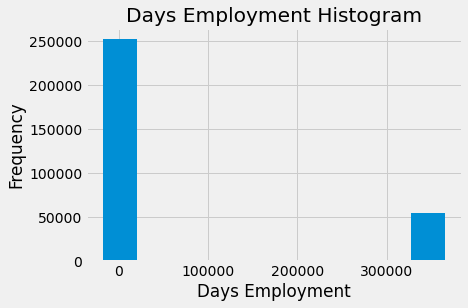

In [141]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [142]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Well that is extremely interesting! It turns out that the anomalies have a lower rate of default.

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common.

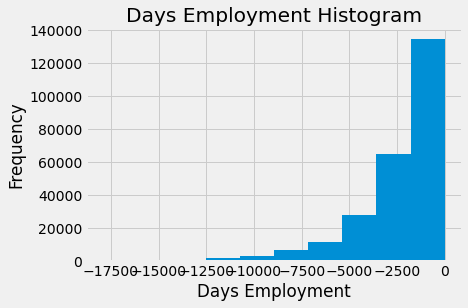

In [143]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.

## Correlations

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

    .00-.19 “very weak”
    .20-.39 “weak”
    .40-.59 “moderate”
    .60-.79 “strong”
    .80-1.0 “very strong”


In [144]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Let's take a look at some of more significant correlations: the DAYS_BIRTH is the most positive correlationLooking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

In [145]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830984513

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.


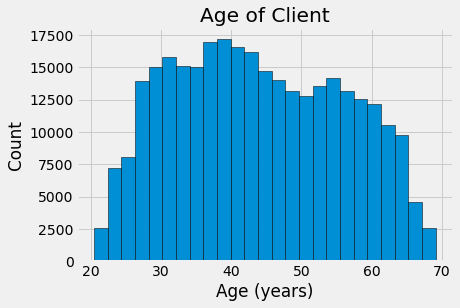

In [146]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

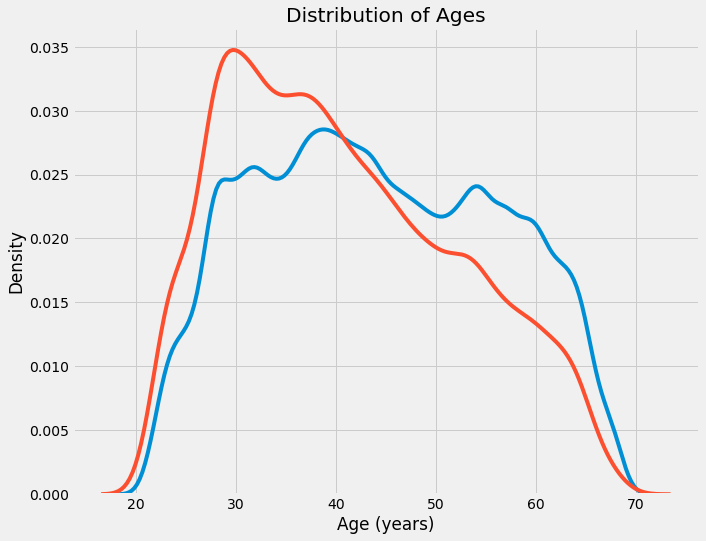

In [147]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.


In [148]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [149]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


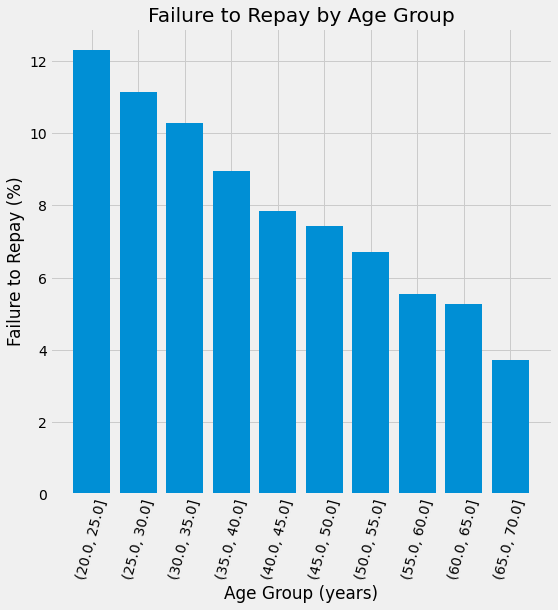

In [150]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');



There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.


## Exterior Sources

The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.


In [151]:


# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs



,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


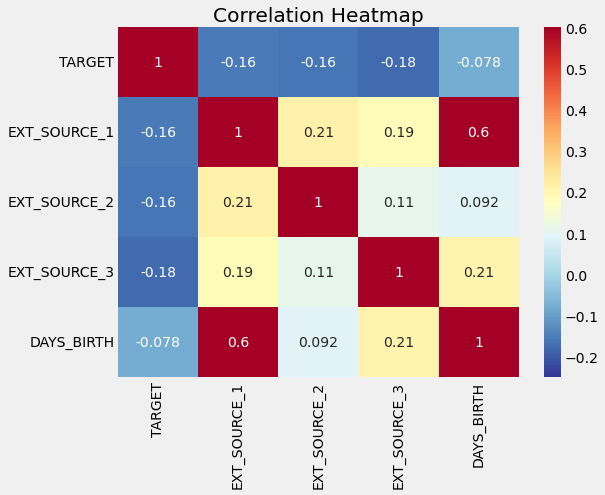

In [152]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');



All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.


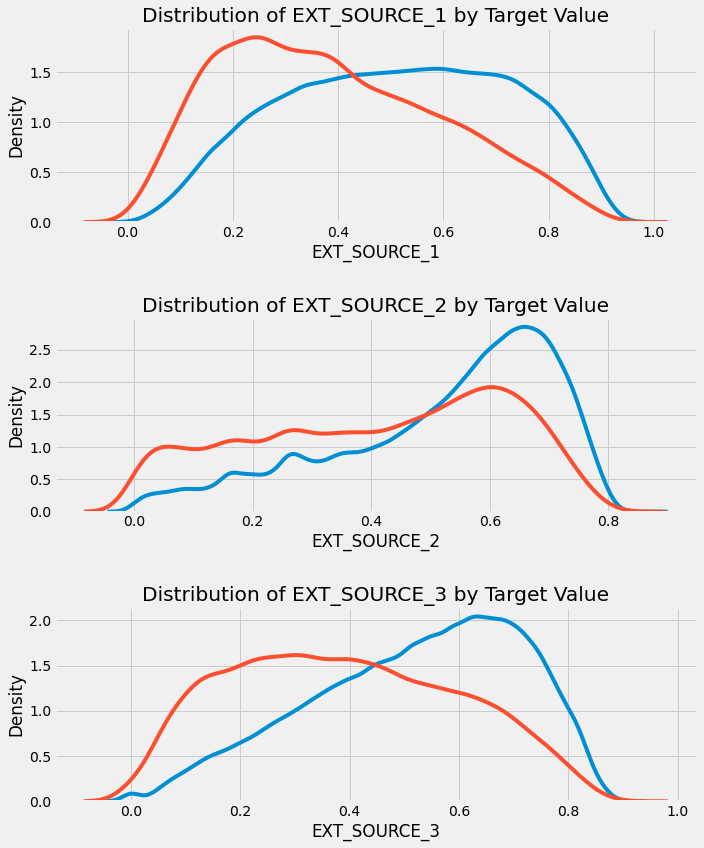

In [153]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

## Feature Engineering

Ratio

In [154]:


app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']

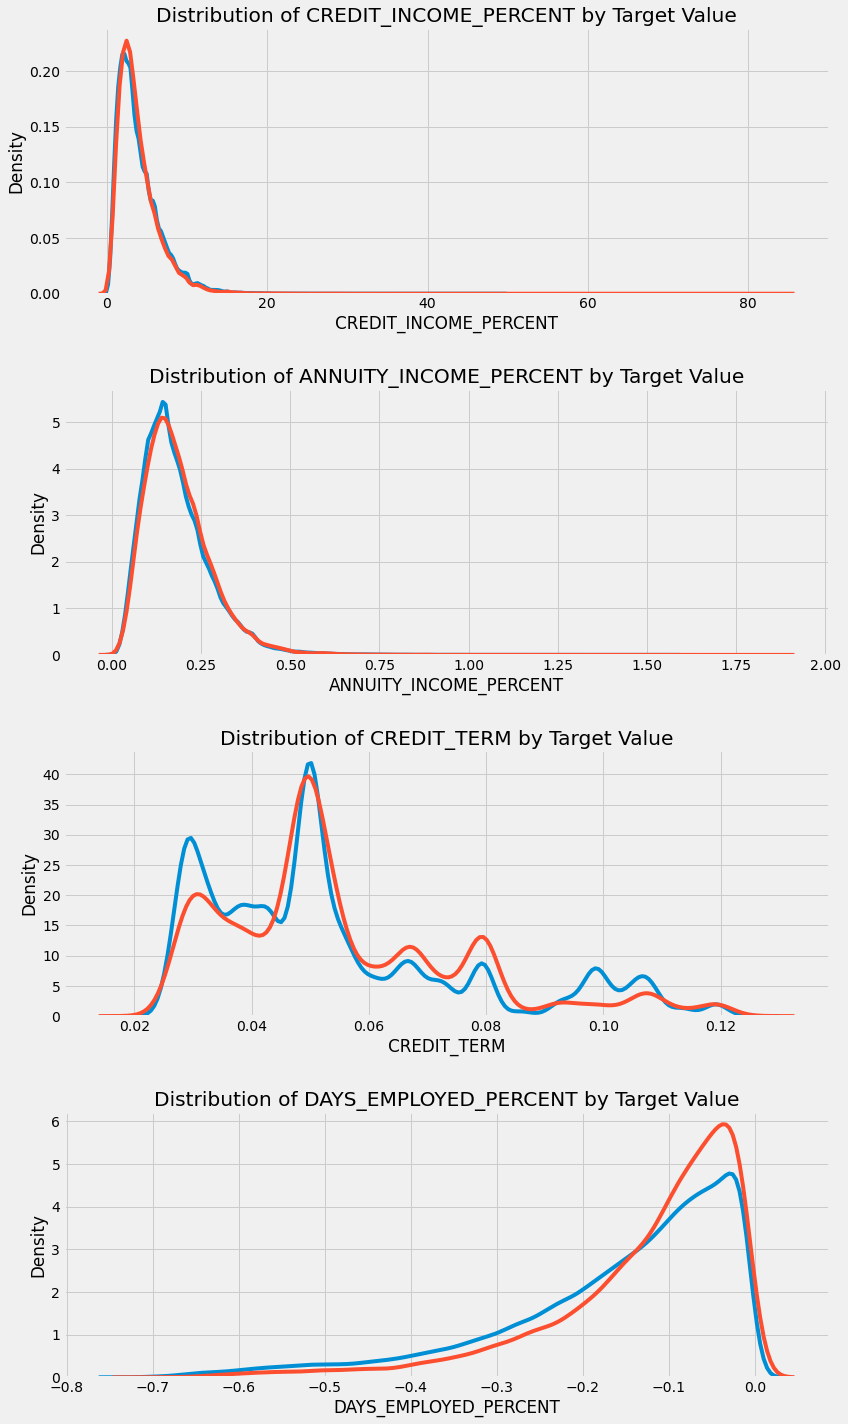

In [155]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)



It's hard to say ahead of time if these new features will be useful. The only way to tell for sure is to try them out!


In [156]:

missing_values = missing_values_table(app_train)
missing_values.head(50)

Your selected dataframe has 248 columns.
There are 65 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
FLOORSMIN_AVG,208642,67.8


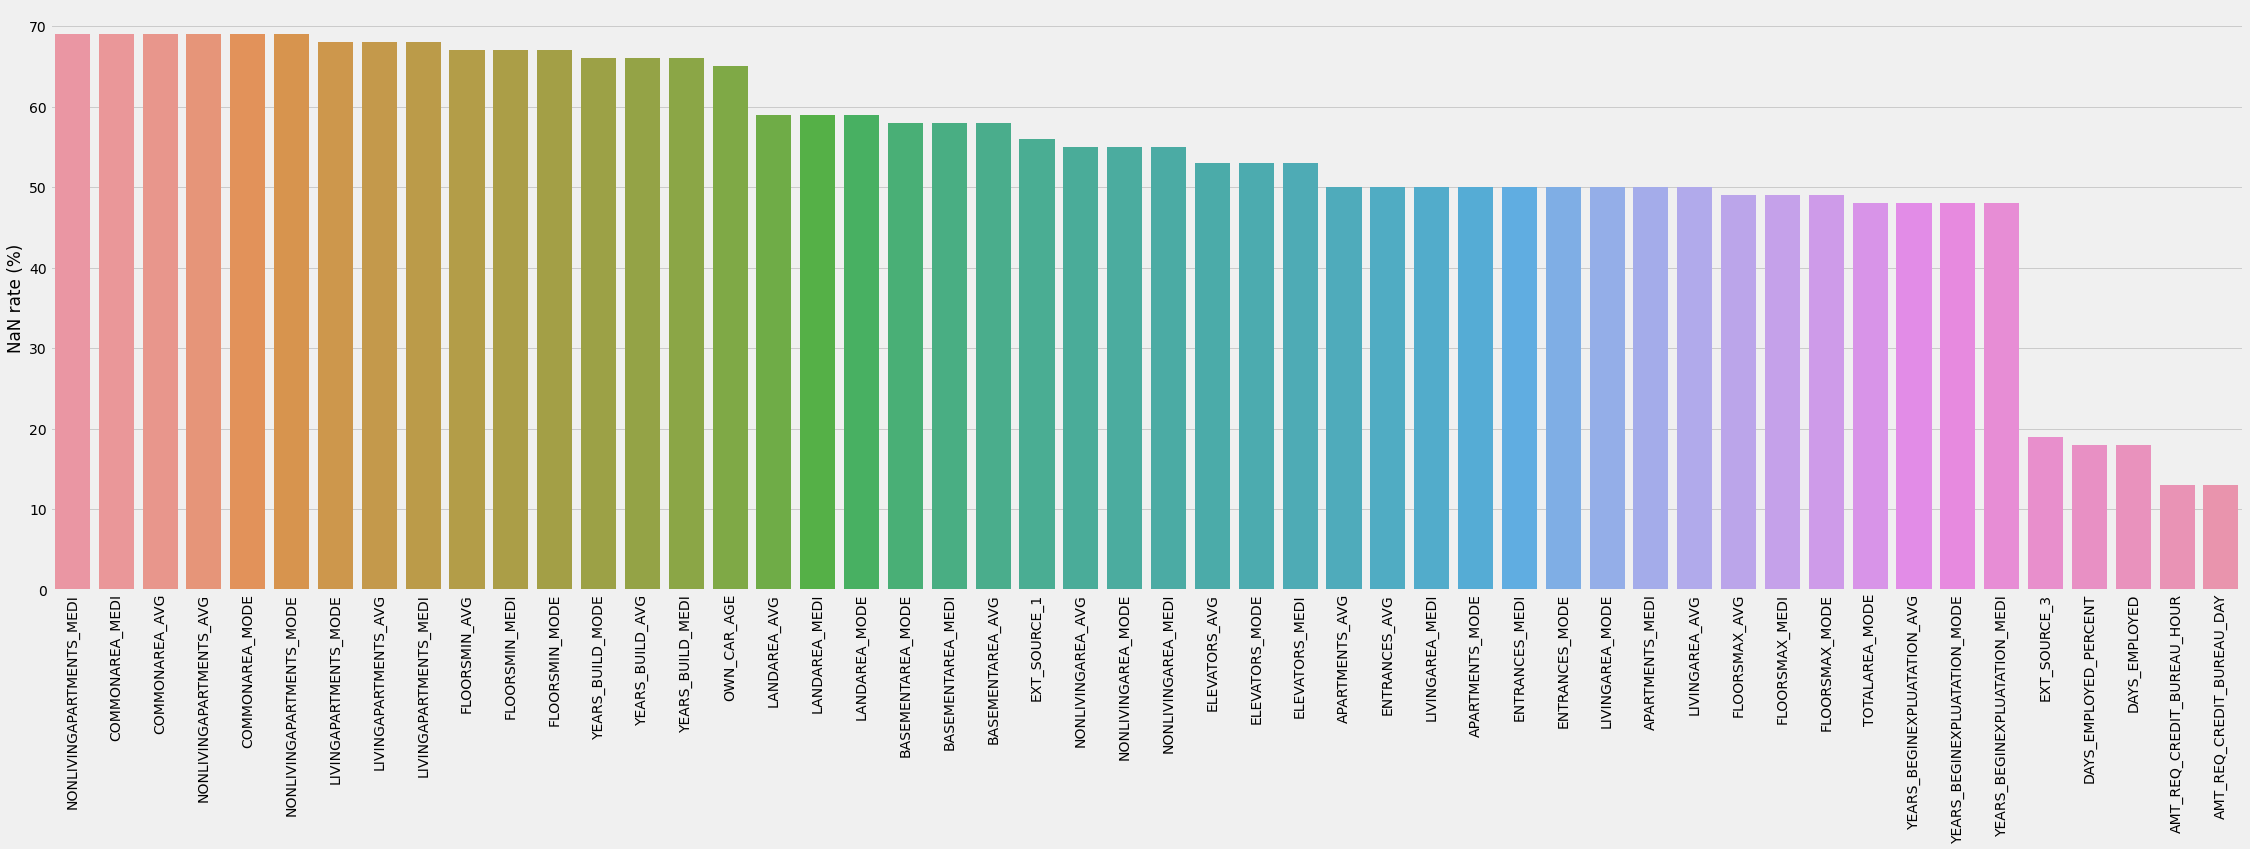

In [157]:
df=app_train

is_nan = (100*app_train.isna().sum()/len(app_train)).astype('int').sort_values(ascending=False)

plt.figure(figsize=(35,10))
sns.barplot(x=is_nan.head(50).index, y=is_nan.head(50))
plt.xticks(rotation = 90)
plt.ylabel('NaN rate (%)');

In [158]:
column_with_nan = app_train.columns[app_train.isnull().any()]
print(app_train.shape)

for column in column_with_nan:
    print(column, app_train[column].isnull().sum())

(307511, 248)
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
DAYS_EMPLOYED 55374
OWN_CAR_AGE 202929
CNT_FAM_MEMBERS 2
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELEVATORS_AVG 163891
ENTRANCES_AVG 154828
FLOORSMAX_AVG 153020
FLOORSMIN_AVG 208642
LANDAREA_AVG 182590
LIVINGAPARTMENTS_AVG 210199
LIVINGAREA_AVG 154350
NONLIVINGAPARTMENTS_AVG 213514
NONLIVINGAREA_AVG 169682
APARTMENTS_MODE 156061
BASEMENTAREA_MODE 179943
YEARS_BEGINEXPLUATATION_MODE 150007
YEARS_BUILD_MODE 204488
COMMONAREA_MODE 214865
ELEVATORS_MODE 163891
ENTRANCES_MODE 154828
FLOORSMAX_MODE 153020
FLOORSMIN_MODE 208642
LANDAREA_MODE 182590
LIVINGAPARTMENTS_MODE 210199
LIVINGAREA_MODE 154350
NONLIVINGAPARTMENTS_MODE 213514
NONLIVINGAREA_MODE 169682
APARTMENTS_MEDI 156061
BASEMENTAREA_MEDI 179943
YEARS_BEGINEXPLUATATION_MEDI 150007
YEARS_BUILD_MEDI 204488
COMMONAREA_MEDI 214865
ELEVATORS_MEDI 163891

In [159]:
for column in column_with_nan:
    if app_train[column].isnull().sum()*100.0/app_train.shape[0] > 47:
             app_train.drop(column,1, inplace=True)

print(app_train.shape)


(307511, 203)


In [160]:
missing_values = missing_values_table(app_train)
missing_values.head(40)

Your selected dataframe has 203 columns.
There are 20 columns that have missing values.


,Missing Values,% of Total Values
EXT_SOURCE_3,60965,19.8
DAYS_EMPLOYED_PERCENT,55374,18.0
DAYS_EMPLOYED,55374,18.0
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3


In [161]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from collections import Counter

In [162]:
for col in app_train.columns:
    if col.endswith("_MEDI") or col.endswith("_MODE"):
        app_train.drop(columns=col, inplace=True)

In [163]:
# Feature names
features = list(app_train.columns)

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
#scaler = MinMaxScaler(feature_range = (0, 1))

app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED_ANOM'].astype('int32')


imputer.fit(app_train)

app_train_id = app_train['SK_ID_CURR']

# Repeat with the scaler
#scaler.fit(app_train)
#app_train = scaler.transform(app_train)


# Transform  training  data

app_train = imputer.transform(app_train)

app_train = pd.DataFrame(app_train)

app_train.columns = features





app_train['SK_ID_CURR'] = app_train_id


In [164]:
# A random selection of 2000 examples among the dataset for deployement

data_model_sam = app_train.sample(2000, random_state=1)
data_model_sam.to_csv('data_model_sampled.csv')
data_model_sam

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
64282,174545,1.0,0.0,0.0,1.0,0.0,135000.0,654498.0,31617.0,585000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.848133,0.234200,0.048307,-0.118733
94645,209898,0.0,0.0,1.0,1.0,0.0,135000.0,234576.0,25393.5,202500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.737600,0.188100,0.108253,-0.118943
306349,454938,0.0,0.0,1.0,1.0,0.0,112500.0,157914.0,16753.5,139500.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.403680,0.148920,0.106093,-0.007155
258314,398930,0.0,0.0,1.0,0.0,0.0,247500.0,1125000.0,36292.5,1125000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.545455,0.146636,0.032260,-0.106891
87597,201672,0.0,0.0,0.0,1.0,0.0,202500.0,900000.0,35158.5,900000.0,...,0.0,1.0,0.0,1.0,0.0,0.0,4.444444,0.173622,0.039065,-0.135494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60563,170223,0.0,0.0,0.0,0.0,0.0,112500.0,225000.0,15219.0,225000.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2.000000,0.135280,0.067640,-0.175913
43325,150151,0.0,1.0,0.0,1.0,0.0,58500.0,157500.0,7875.0,157500.0,...,0.0,0.0,0.0,1.0,0.0,1.0,2.692308,0.134615,0.050000,-0.118733
114342,232603,0.0,0.0,0.0,1.0,0.0,162000.0,810000.0,29223.0,810000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,0.180389,0.036078,-0.055797
37681,143648,0.0,0.0,1.0,1.0,3.0,315000.0,1312110.0,52168.5,1125000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.165429,0.165614,0.039759,-0.110799


In [165]:
# Feature names
features = list(app_train.columns)




# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED_ANOM'].astype('int32')



 #Saler fit
scaler.fit(app_train)
app_train = scaler.transform(app_train)


# Transform  training  data

app_train = imputer.transform(app_train)

app_train = pd.DataFrame(app_train)

app_train.columns = features





app_train['SK_ID_CURR'] = app_train_id

In [166]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1.0,0.0,0.0,1.0,0.0,0.001512,0.090287,0.090032,0.077441,...,0.0,1.0,0.0,1.0,0.0,0.0,0.023640,0.064910,0.377861,0.907618
1,100003,0.0,0.0,0.0,0.0,0.0,0.002089,0.311736,0.132924,0.271605,...,0.0,0.0,0.0,1.0,0.0,0.0,0.056483,0.070368,0.053985,0.902771
2,100004,0.0,1.0,1.0,1.0,0.0,0.000358,0.022472,0.020025,0.023569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.023547,0.053193,0.272843,0.983791
3,100006,0.0,0.0,0.0,1.0,0.0,0.000935,0.066837,0.109477,0.063973,...,0.0,0.0,0.0,0.0,0.0,0.0,0.027278,0.117114,0.711908,0.780594
4,100007,0.0,0.0,0.0,1.0,0.0,0.000819,0.116854,0.078975,0.117845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.049774,0.095823,0.200770,0.790867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0.0,0.0,0.0,0.0,0.0,0.001127,0.052360,0.101176,0.046016,...,0.0,1.0,0.0,1.0,0.0,0.0,0.019029,0.093162,0.841421,0.965282
307507,456252,0.0,0.0,0.0,1.0,0.0,0.000396,0.056067,0.040505,0.046016,...,0.0,1.0,0.0,1.0,0.0,1.0,0.044127,0.088746,0.219346,0.837087
307508,456253,0.0,0.0,0.0,1.0,0.0,0.001089,0.157969,0.110618,0.135802,...,1.0,0.0,0.0,1.0,0.0,0.0,0.052216,0.104341,0.216557,0.273795
307509,456254,1.0,0.0,0.0,1.0,0.0,0.001243,0.081175,0.072499,0.069585,...,0.0,1.0,0.0,1.0,0.0,0.0,0.025487,0.062873,0.317709,0.450978


## Modelisation

In [167]:
df_pay = app_train[app_train.TARGET == 0]
df_unpay = app_train[app_train.TARGET == 1]
print(f'Len TARGET == 0: {len(df_pay)} and Len TARGET == 1: {len(df_unpay)}')

Len TARGET == 0: 282686 and Len TARGET == 1: 24825


In [168]:
# smote for deal with unbalanced class 


X = app_train.drop(columns=['SK_ID_CURR','TARGET'])
y = app_train['TARGET']
counter = Counter(y)
print(counter)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({0.0: 282686, 1.0: 24825})
Counter({1.0: 282686, 0.0: 282686})


In [169]:
#apply model
print (X.shape)
print (y.shape)

(565372, 201)
(565372,)


In [170]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.2)

### DummyClassifier

In [172]:
import pickle 

print (pickle.format_version)

4.0


In [173]:
# Preparation of the pipeline

# Numerical data 
#num__list = list(app_train.select_dtypes(['int64', 'float64']).columns)

#preprocessor= make_pipeline([("scaler", StandardScaler())])
#scaler = StandardScaler()                              
#oversample = SMOTE()  

In [174]:
# baseline with a naïve model
model = DummyClassifier(strategy='stratified')
pipe=Pipeline(steps= [
                    ('scaler',scaler),
                    ("SMOTE", oversample),
                    ("Dummy", model)
                    ])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('SMOTE', SMOTE()),
                ('Dummy', DummyClassifier(strategy='stratified'))])

In [175]:
pipe.score(X_test, y_test)

0.5005527304886137

In [176]:
y_pred_test = pipe.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     56567
         1.0       0.50      0.50      0.50     56508

    accuracy                           0.50    113075
   macro avg       0.50      0.50      0.50    113075
weighted avg       0.50      0.50      0.50    113075



We can see that the accuracy the recall and the F1 score are low

### Random Forest Classifier

In [177]:
# Instantiate and fit the RandomForestClassifier

model = RandomForestClassifier()
params = [{'n_estimators': [100, 200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,6,8],'criterion' :['gini', 'entropy']}]    
GSCV = GridSearchCV(model,params,scoring="roc_auc")
GSCV.fit(X_train,y_train)
GSCV.best_params_
best_model1 = GSCV.best_estimator_

In [178]:
#test Pipeline
#model = RandomForestClassifier()
#params = [{'n_estimators': [100, 200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,6,8],'criterion' :['gini', 'entropy']}]

#basic_pipe=Pipeline(steps= [
#                   ('scaler',scaler),
#                   ("SMOTE", oversample),
#                   ('Model', RandomForestClassifier())
#                   ])
#basic_pipe.fit(X_train,y_train)

#GSCV = GridSearchCV(estimator= basic_pipe,
#                      param_grid = params,
#                      scoring= "roc_auc",
#                      cv=5)

#GSCV = GridSearchCV(basic_pipe,params,scoring="roc_auc")
#GSCV.fit(X_train,y_train)
#GSCV.best_params_
#best_model1 = GSCV.best_estimator_

In [179]:
from sklearn.metrics import roc_curve
preds = best_model1.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
#print('Opoptimal threshold :'optimal_threshold)
optimal_threshold

0.513901872904722

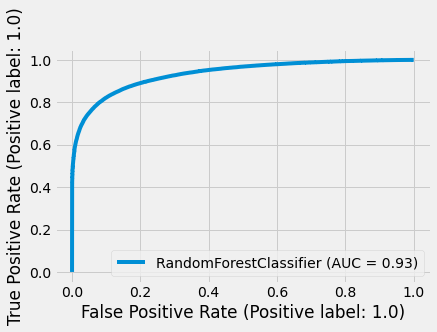

In [180]:
#plot roc cruve
from sklearn import metrics


metrics.plot_roc_curve(best_model1, X_test, y_test) 

plt.show()

In [181]:
# Make predictions for the test set
y_pred_test = best_model1.predict(X_test)

In [182]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.8603758567322574

In [183]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[49907,  6660],
       [ 9128, 47380]], dtype=int64)

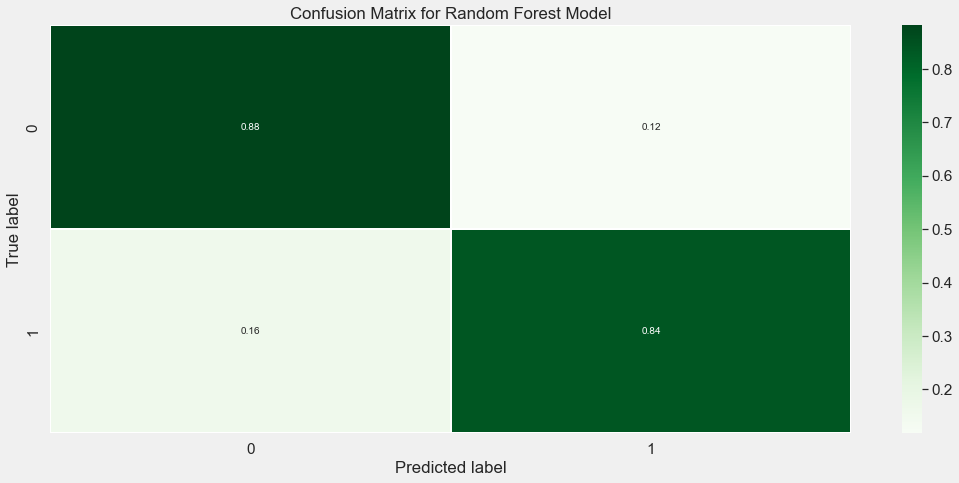

In [184]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

#tick_marks = np.arange(len(class_names))
#tick_marks2 = tick_marks + 0.5

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [185]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86     56567
         1.0       0.88      0.84      0.86     56508

    accuracy                           0.86    113075
   macro avg       0.86      0.86      0.86    113075
weighted avg       0.86      0.86      0.86    113075



In [186]:
#features importances 


feature_importance =  best_model1.feature_importances_

feature_importance

array([3.38825944e-03, 9.83106128e-03, 2.92690444e-03, 7.21879583e-02,
       4.27435895e-03, 9.95570725e-03, 4.10942890e-03, 1.85737172e-02,
       1.32881060e-02, 8.94537277e-03, 4.65967677e-03, 3.35876217e-03,
       1.28028978e-02, 0.00000000e+00, 1.83699884e-04, 1.72600697e-03,
       7.16435818e-06, 1.09734353e-02, 2.53339788e-03, 4.82144589e-02,
       3.07609745e-02, 3.70207710e-02, 4.82120376e-03, 1.40659060e-05,
       6.03849795e-05, 4.62599263e-05, 2.38021711e-04, 3.99278939e-04,
       1.45785068e-04, 8.03909295e-02, 9.51566514e-02, 9.18527635e-02,
       4.59075801e-02, 7.93725164e-02, 3.01155065e-02, 1.72316222e-02,
       3.85092414e-07, 1.46577417e-02, 0.00000000e+00, 3.73538148e-05,
       9.22325956e-05, 0.00000000e+00, 3.40276478e-04, 9.37891802e-06,
       0.00000000e+00, 1.54853263e-05, 0.00000000e+00, 7.42064554e-06,
       9.34531851e-06, 2.16623983e-06, 4.07205679e-05, 0.00000000e+00,
       5.45128062e-05, 1.53868608e-06, 2.16471186e-06, 4.28271225e-07,
      

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns 


def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df = fi_df.head(15)
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


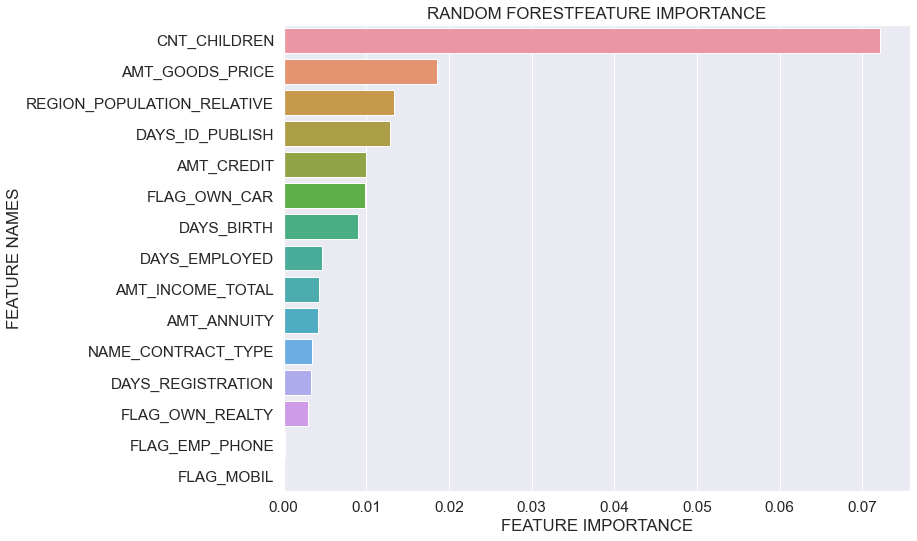

In [207]:
plot_feature_importance(best_model1.feature_importances_,X.columns,'RANDOM FOREST') 

### test model 2 recall 

In [189]:

model = RandomForestClassifier()
params = [{'n_estimators': [100, 200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,6,8],'criterion' :['gini', 'entropy']}]    
GSCV = GridSearchCV(model,params,scoring="recall")
GSCV.fit(X_train,y_train)
GSCV.best_params_
best_model2 = GSCV.best_estimator_

In [190]:
preds = best_model2.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_train, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
#print('Opoptimal threshold :'optimal_threshold)
optimal_threshold

0.5122919001958856

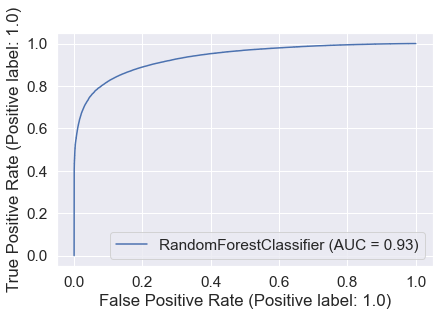

In [191]:
from sklearn import metrics
metrics.plot_roc_curve(best_model2, X_test, y_test) 

plt.show()

In [192]:
y_pred_test = best_model2.predict(X_test)

In [193]:
accuracy_score(y_test, y_pred_test)

0.8605704178642494

In [194]:
confusion_matrix(y_test, y_pred_test)

array([[50167,  6400],
       [ 9366, 47142]], dtype=int64)

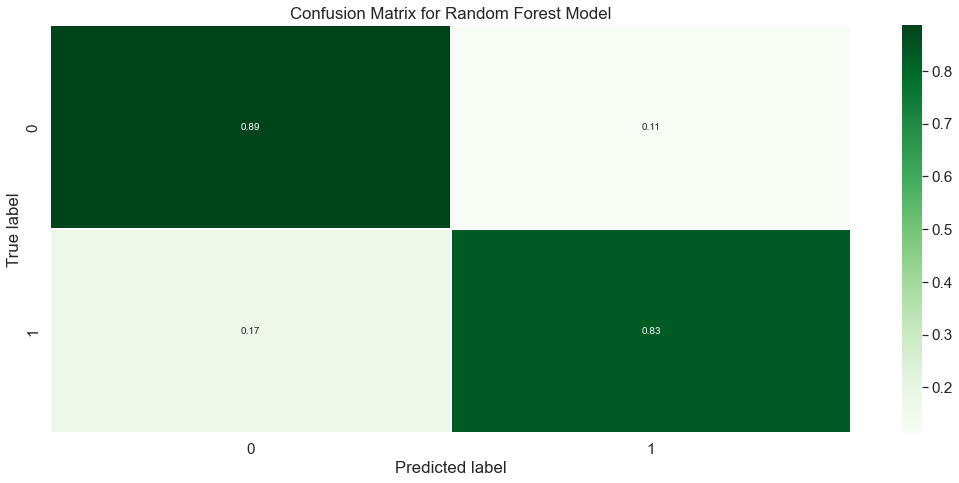

In [195]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

#tick_marks = np.arange(len(class_names))
#tick_marks2 = tick_marks + 0.5

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [196]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86     56567
         1.0       0.88      0.83      0.86     56508

    accuracy                           0.86    113075
   macro avg       0.86      0.86      0.86    113075
weighted avg       0.86      0.86      0.86    113075



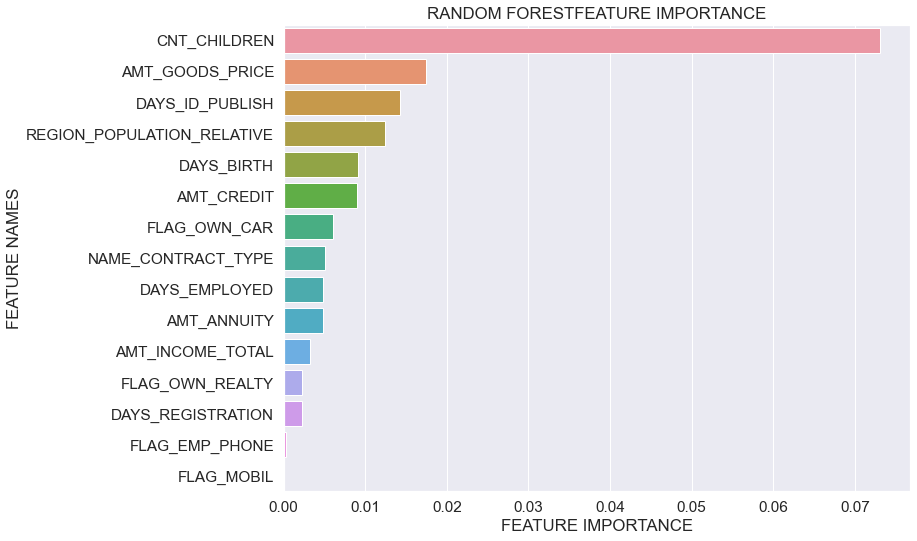

In [208]:
feature_importance =  best_model2.feature_importances_

plot_feature_importance(best_model2.feature_importances_,X.columns,'RANDOM FOREST')

In [198]:
best_model2

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [199]:
import pickle
pickle.dump(best_model2, open('RFC_best.sav', 'wb'))

In [200]:
model = RandomForestClassifier()
params = [{'n_estimators': [100, 200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,6,8],'criterion' :['gini', 'entropy']}]    
GSCV = GridSearchCV(model,params,scoring="f1")
GSCV.fit(X_train,y_train)
GSCV.best_params_
best_model3 = GSCV.best_estimator_

In [201]:
y_pred_test = best_model3.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.860738447932788

In [202]:
confusion_matrix(y_test, y_pred_test)

array([[50027,  6540],
       [ 9207, 47301]], dtype=int64)

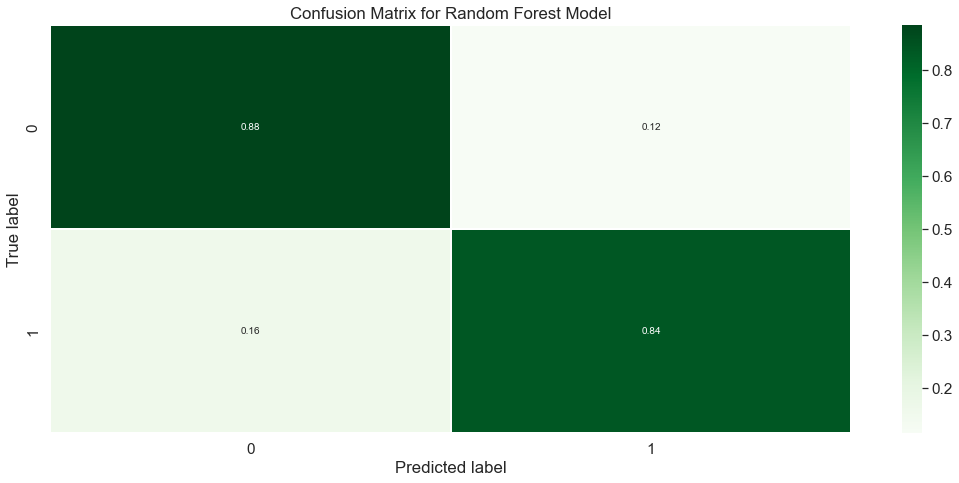

In [203]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

#tick_marks = np.arange(len(class_names))
#tick_marks2 = tick_marks + 0.5

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred_test))

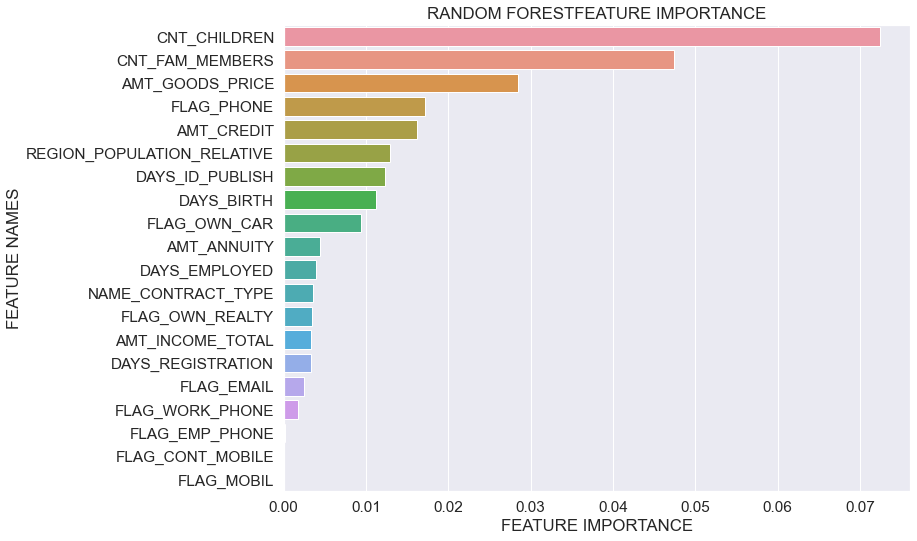

In [205]:
feature_importance =  best_model3.feature_importances_

plot_feature_importance(best_model3.feature_importances_,X.columns,'RANDOM FOREST')

## Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression
# Modelisation with a logistic regression

lr = LogisticRegression(class_weight='balanced', max_iter= 10000 )
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
clf = GridSearchCV(lr, grid, scoring='recall')
clf.fit(X_train, y_train)
clf.best_estimator_



LogisticRegression(C=100.0, class_weight='balanced', max_iter=10000)

In [211]:
best_model= clf.best_estimator_

In [212]:
y_pred_test = best_model.predict(X_test)

In [213]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.7102896307760336

In [214]:
confusion_matrix(y_test, y_pred_test)

array([[39700, 16867],
       [15892, 40616]], dtype=int64)

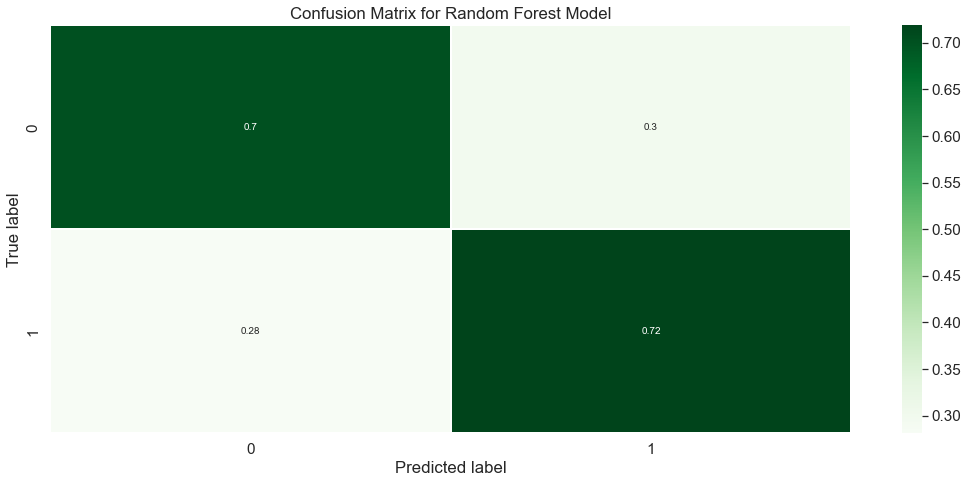

In [215]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot

#tick_marks = np.arange(len(class_names))
#tick_marks2 = tick_marks + 0.5

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [216]:
print(classification_report(y_test, y_pred_test)) 

              precision    recall  f1-score   support

         0.0       0.71      0.70      0.71     56567
         1.0       0.71      0.72      0.71     56508

    accuracy                           0.71    113075
   macro avg       0.71      0.71      0.71    113075
weighted avg       0.71      0.71      0.71    113075

